In [ ]:
# 상관계수 만들기 OIL PRESENT, 나프타, 황중유, 

In [2]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("화이팅_ㅋ.csv")

In [7]:
df

,SCFI,코로나확진자,환율,WTI유가,나프타유가,고유황중유가
주차,,,,,,
2013-1,1148.08,0.0,1056.49,93.56,106.6980,96.1060
2013-2,1232.35,0.0,1058.35,95.56,105.0360,97.7760
2013-3,1245.84,0.0,1075.58,95.88,103.4800,97.2140
2013-4,1227.84,0.0,1095.19,97.77,106.6620,97.4920
2013-5,1219.39,0.0,1096.00,95.72,108.1780,98.5660
...,...,...,...,...,...,...
2024-15,1757.04,39459.0,1374.30,83.14,74.9875,79.6475
2024-16,1769.54,31841.0,1376.43,83.85,74.3400,80.8120
2024-17,1940.63,34278.0,1354.63,78.11,75.0220,80.4920


In [6]:
# 날짜를 인덱스로 설정
df.set_index('주차', inplace=True)

KeyError: "None of ['주차'] are in the columns"

In [8]:
df.iloc[563:570]

,SCFI,코로나확진자,환율,WTI유가,나프타유가,고유황중유가
주차,,,,,,
2023-52,1759.57,27732700.0,1314.16,73.81,74.1325,69.605
2023-52,1759.57,27732700.0,1314.16,73.69,74.1325,69.605
2023-52,1759.57,27732700.0,1253.50,73.81,74.1325,69.605
2023-52,1759.57,27732700.0,1253.50,73.69,74.1325,69.605
2023-52,1759.57,263390.0,1314.16,73.81,74.1325,69.605
2023-52,1759.57,263390.0,1314.16,73.69,74.1325,69.605
2023-52,1759.57,263390.0,1253.50,73.81,74.1325,69.605


In [9]:
df.drop(df.index[563:570], inplace=True)

In [10]:
df

,SCFI,코로나확진자,환율,WTI유가,나프타유가,고유황중유가
주차,,,,,,
2013-1,1148.08,0.0,1056.49,93.56,106.6980,96.1060
2013-2,1232.35,0.0,1058.35,95.56,105.0360,97.7760
2013-3,1245.84,0.0,1075.58,95.88,103.4800,97.2140
2013-4,1227.84,0.0,1095.19,97.77,106.6620,97.4920
2013-5,1219.39,0.0,1096.00,95.72,108.1780,98.5660
...,...,...,...,...,...,...
2024-15,1757.04,39459.0,1374.30,83.14,74.9875,79.6475
2024-16,1769.54,31841.0,1376.43,83.85,74.3400,80.8120
2024-17,1940.63,34278.0,1354.63,78.11,75.0220,80.4920


In [11]:
df.drop('환율', axis=1, inplace=True)

In [26]:
df

,SCFI,코로나확진자,WTI유가,나프타유가,고유황중유가
주차,,,,,
2013-1,1148.08,0.0,93.56,106.6980,96.1060
2013-2,1232.35,0.0,95.56,105.0360,97.7760
2013-3,1245.84,0.0,95.88,103.4800,97.2140
2013-4,1227.84,0.0,97.77,106.6620,97.4920
2013-5,1219.39,0.0,95.72,108.1780,98.5660
...,...,...,...,...,...
2024-15,1757.04,39459.0,83.14,74.9875,79.6475
2024-16,1769.54,31841.0,83.85,74.3400,80.8120
2024-17,1940.63,34278.0,78.11,75.0220,80.4920


In [12]:
X = df.drop(['SCFI'],axis=1)
Y = df['SCFI']

In [13]:
# 데이터 정규화
scaler_X = RobustScaler()
scaled_X = scaler_X.fit_transform(X)

scaler_Y = RobustScaler()
scaled_Y = scaler_Y.fit_transform(Y.values.reshape(-1, 1))



Epoch 1/200


464/464 [==============================] - 10s 4ms/step - loss: 2.7687 - mae: 0.8357
Epoch 2/200
464/464 [==============================] - 2s 5ms/step - loss: 0.5942 - mae: 0.4657
Epoch 3/200
464/464 [==============================] - 2s 4ms/step - loss: 0.3478 - mae: 0.3865
Epoch 4/200
464/464 [==============================] - 2s 5ms/step - loss: 0.2445 - mae: 0.3473
Epoch 5/200
464/464 [==============================] - 2s 4ms/step - loss: 0.2769 - mae: 0.3559
Epoch 6/200
464/464 [==============================] - 2s 4ms/step - loss: 0.3060 - mae: 0.3681
Epoch 7/200
464/464 [==============================] - 2s 5ms/step - loss: 0.2815 - mae: 0.3566
Epoch 8/200
464/464 [==============================] - 3s 5ms/step - loss: 0.2714 - mae: 0.3625
Epoch 9/200
464/464 [==============================] - 2s 5ms/step - loss: 0.2368 - mae: 0.3435
Epoch 10/200
464/464 [==============================] - 2s 5ms/step - loss: 0.2332 - mae: 0.3378
Epoch 11/200
464/464 [============

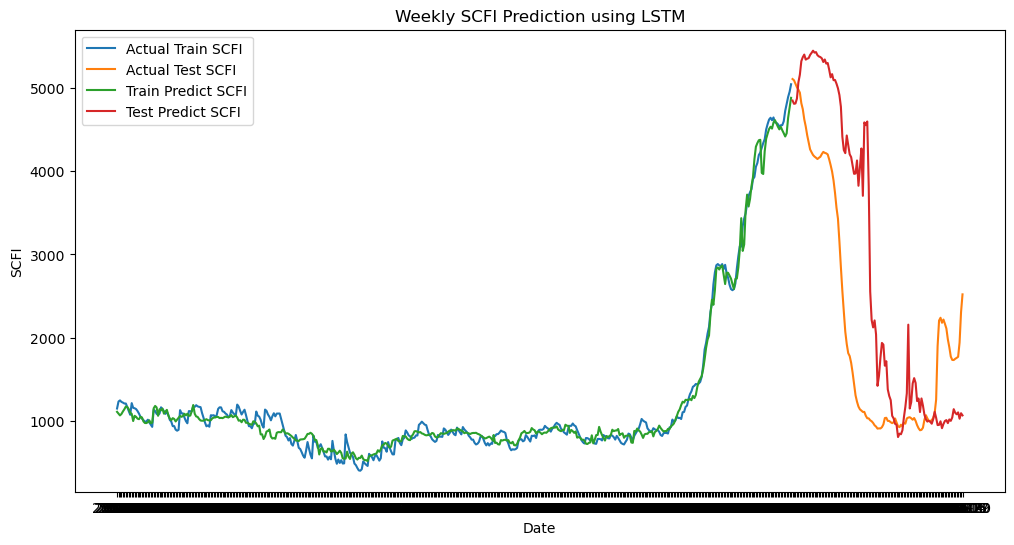

In [14]:

# 데이터셋을 훈련 및 테스트 세트로 분할
train_size = int(len(scaled_X) * 0.8)
test_size = len(scaled_X) - train_size
X_train, X_test = scaled_X[:train_size], scaled_X[train_size:]
Y_train, Y_test = scaled_Y[:train_size], scaled_Y[train_size:]

# LSTM 입력 형태로 데이터 변환 [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# LSTM 모델 생성
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(1, X_train.shape[2])))
model.add(LSTM(100, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mae'])

# 모델 훈련
model.fit(X_train, Y_train, epochs=200, batch_size=1, verbose=1)

# 모델 훈련
model.fit(X_train, Y_train, epochs=100, batch_size=1, verbose=1)

# 모델 예측
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# 예측 데이터 역정규화
train_predict = scaler_Y.inverse_transform(train_predict)
test_predict = scaler_Y.inverse_transform(test_predict)

# 실제 데이터 역정규화
Y_train_actual = scaler_Y.inverse_transform(Y_train)
Y_test_actual = scaler_Y.inverse_transform(Y_test)

# 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(df.index[:len(Y_train_actual)], Y_train_actual, label='Actual Train SCFI')
plt.plot(df.index[len(Y_train_actual):(len(Y_train_actual) + len(Y_test_actual))], Y_test_actual, label='Actual Test SCFI')
plt.plot(df.index[:len(train_predict)], train_predict, label='Train Predict SCFI')
plt.plot(df.index[len(train_predict):(len(train_predict) + len(test_predict))], test_predict, label='Test Predict SCFI')
plt.xlabel('Date')
plt.ylabel('SCFI')
plt.title('Weekly SCFI Prediction using LSTM')
plt.legend()
plt.show()


In [15]:
loss, mae = model.evaluate(X_test,Y_test)
print(f'Test loss:{loss:.3f}')
print(f'Test MAE:{mae:.3f}')

4/4 [==============================] - 2s 6ms/step - loss: 13.5361 - mae: 2.8011
Test loss:13.536
Test MAE:2.801
